In [1222]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV

%config InlineBackend.figure_format = "svg"

In [1223]:
data = pd.read_csv("/Users/nouf/Desktop/Airbnb_price_prediction/Data/train.csv")

In [1224]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [1225]:
data.shape

(74111, 29)

# Split

In [1226]:
df, validation_df  = train_test_split(data,
                               test_size=0.25,
                               random_state = 101)

In [1227]:
df_train, df_test  = train_test_split(df,
                               test_size=0.25,
                               random_state = 101)

# EDA

# Distribution of log price

/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



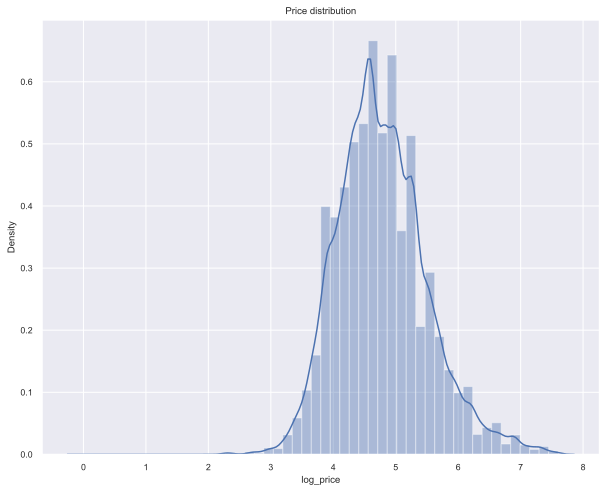

In [1228]:
plt.figure(figsize = (10, 8))
sns.distplot(df_train["log_price"])
plt.title('Price distribution')
plt.show()


# Property type

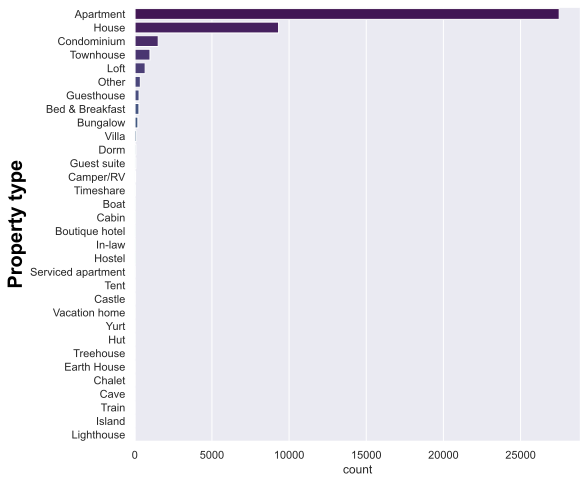

In [1229]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'property_type',data = df_train,order = df_train['property_type'].value_counts().index,palette = "viridis")
plt.ylabel('Property type',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

# Room type

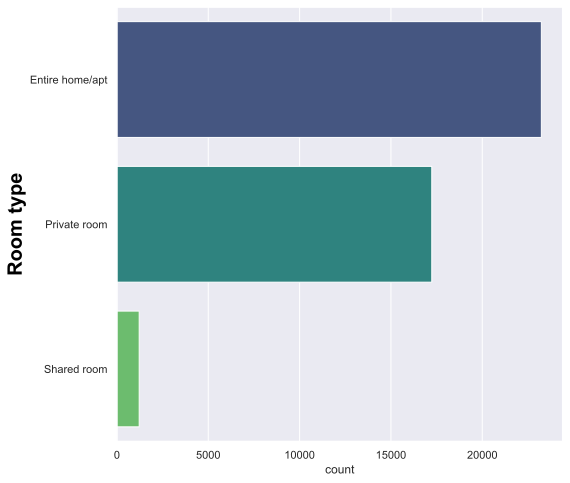

In [1230]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'room_type',data = df_train,order = df_train['room_type'].value_counts().index,palette = "viridis")
plt.ylabel('Room type',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

# Cancellation policy

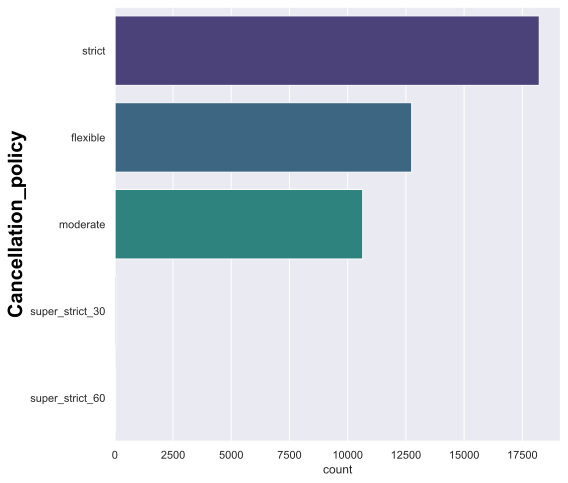

In [1231]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'cancellation_policy',data = df_train,order = df_train['cancellation_policy'].value_counts().index,palette = "viridis")
plt.ylabel('Cancellation_policy',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

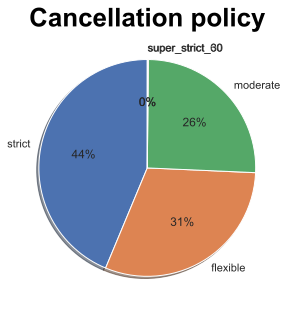

In [1232]:
df_g=df_train['cancellation_policy'].value_counts()
labels=df_g.index
fig,ax1=plt.subplots(1,1,figsize=(5,5))
ax1.pie(df_g,labels=labels, autopct='%1.0f%%',shadow=True, startangle=90)
plt.title("Cancellation policy",fontsize=26, weight = 'bold',color="black")
plt.show()

# bedrooms

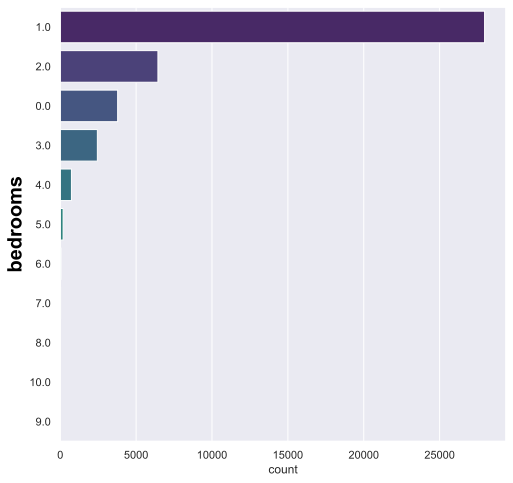

In [1233]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'bedrooms',data = df_train,order = df['bedrooms'].value_counts().index,palette = "viridis")
plt.ylabel('bedrooms',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

#df.bedrooms.value_counts().plot.bar()

# beds

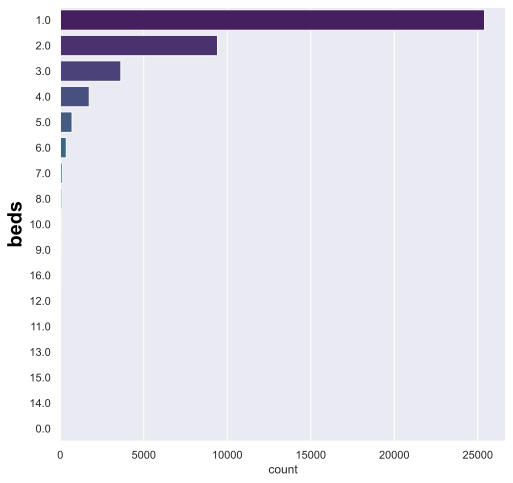

In [1234]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'beds',data = df_train,order = df['beds'].value_counts().index,palette = "viridis")
plt.ylabel('beds',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

#df.bedrooms.value_counts().plot.bar()

# Most popular Neighbourhood

<BarContainer object of 10 artists>

<Figure size 720x720 with 0 Axes>

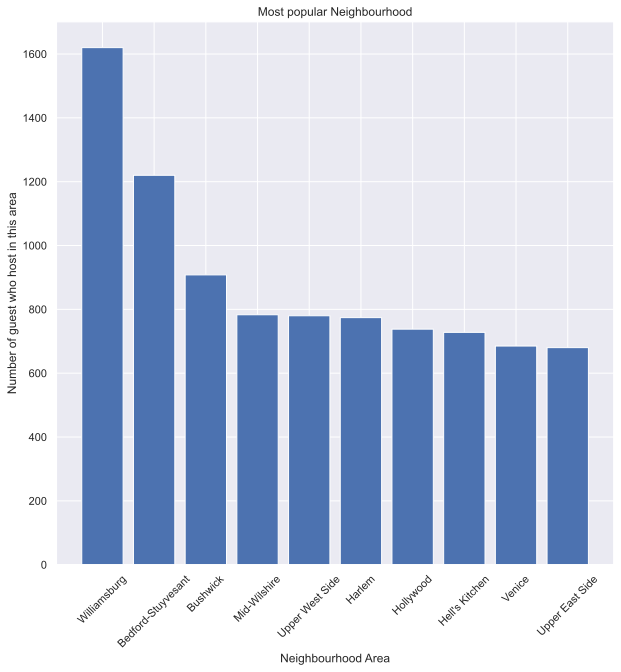

In [1235]:
plt.figure(figsize = (10,10))
data = df_train.neighbourhood.value_counts()[:10]
plt.figure(figsize=(10,10))
x = data.index
y = data.values

plt.title("Most popular Neighbourhood")
plt.xlabel("Neighbourhood Area")
plt.ylabel("Number of guest who host in this area")
plt.xticks(rotation=45)
plt.bar(x,y)

<ipython-input-1236-a13419fee868>:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



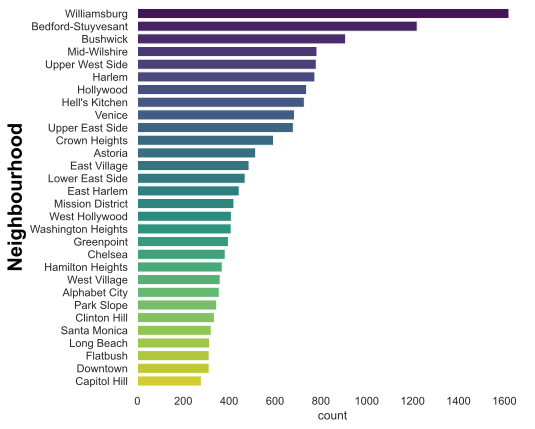

In [1236]:
sns.set(style='darkgrid')
plt.figure(figsize=(7,7))
sns.countplot(y = 'neighbourhood',
              data = df_train,
              order = df_train['neighbourhood'].value_counts().sort_values(ascending= False).head(30).index,palette= 'viridis')
plt.ylabel('Neighbourhood',fontsize = 20, weight = 'bold',color='black')
plt.axes().set(facecolor = "White")
plt.show()

# City

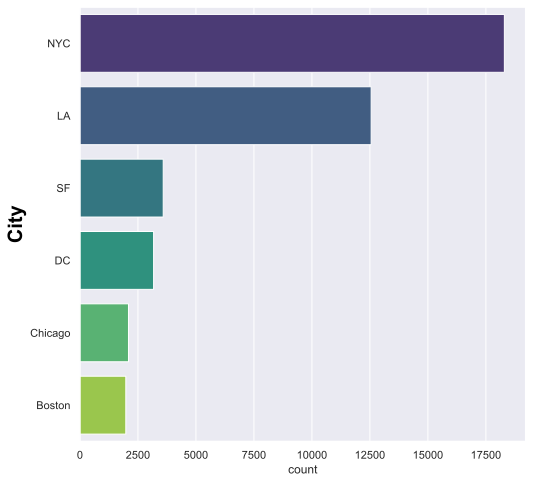

In [1237]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'city',data = df_train,order = df_train['city'].value_counts().index,palette = "viridis")
plt.ylabel('City',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

In [1238]:
import plotly.express as px

def create_map(city):
    price_view = lambda x: 'price: ' + str(round(x, 2))

    if city in {'NYC', 'LA'}:
        fraction = 0.2
    else:
        fraction = 0.6
        
    df_temp = df[df['city'] == city].sample(frac=fraction,random_state=101)
    df_temp['log_price'] = np.round(df_temp['log_price'], 2)
    
    fig = px.scatter_mapbox(df_temp, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_data=["log_price"],
                            color='log_price', 
                            zoom=10)
    
    fig.update_layout(
            title = f'Airbnb prices in {city}',
            geo_scope='usa',
            width=1000, 
            height=600,
            mapbox_style="white-bg",
            mapbox_layers=[{
                 "below": 'traces',
                 "sourcetype": "raster",
                 "sourceattribution": "United States Geological Survey",
                 "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
              }]
    )
    #fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    #fig.update_geos(fitbounds="locations")
    fig.show()
    
#city = interact(lambda x: create_map(x), x=['NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston'])  #widget
create_map('Chicago')

# info

In [1239]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41687 entries, 17236 to 68913
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      41687 non-null  int64  
 1   log_price               41687 non-null  float64
 2   property_type           41687 non-null  object 
 3   room_type               41687 non-null  object 
 4   amenities               41687 non-null  object 
 5   accommodates            41687 non-null  int64  
 6   bathrooms               41571 non-null  float64
 7   bed_type                41687 non-null  object 
 8   cancellation_policy     41687 non-null  object 
 9   cleaning_fee            41687 non-null  bool   
 10  city                    41687 non-null  object 
 11  description             41687 non-null  object 
 12  first_review            32697 non-null  object 
 13  host_has_profile_pic    41573 non-null  object 
 14  host_identity_verified  41573 non-

# Finding missing values

In [1240]:
df_train.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   116
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review               8990
host_has_profile_pic        114
host_identity_verified      114
host_response_rate        10295
host_since                  114
instant_bookable              0
last_review                8970
latitude                      0
longitude                     0
name                          0
neighbourhood              3889
number_of_reviews             0
review_scores_rating       9439
thumbnail_url              4559
zipcode                     527
bedrooms                     43
beds                         67
dtype: int64

# Correlation

In [1241]:
df_train.corr()

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
id,1.000000,-0.002463,-0.006578,-0.002819,-0.004556,-0.002225,-0.003737,0.000041,-0.000573,-0.009706,-0.009079
log_price,-0.002463,1.000000,0.567032,0.358205,0.106226,-0.007625,-0.052040,-0.028919,0.090797,0.467427,0.441327
accommodates,-0.006578,0.567032,1.000000,0.511613,0.178901,-0.081048,-0.087317,0.044066,-0.018990,0.706359,0.809507
bathrooms,-0.002819,0.358205,0.511613,1.000000,0.050093,-0.144490,-0.142446,-0.038312,0.007367,0.594698,0.528395
cleaning_fee,-0.004556,0.106226,0.178901,0.050093,1.000000,-0.056064,-0.063328,0.115250,0.031506,0.097881,0.127748
latitude,-0.002225,-0.007625,-0.081048,-0.144490,-0.056064,1.000000,0.896465,-0.018148,-0.034021,-0.058745,-0.079421
longitude,-0.003737,-0.052040,-0.087317,-0.142446,-0.063328,0.896465,1.000000,-0.052849,-0.050448,-0.078509,-0.083303
number_of_reviews,0.000041,-0.028919,0.044066,-0.038312,0.115250,-0.018148,-0.052849,1.000000,0.008158,-0.033206,0.030526
review_scores_rating,-0.000573,0.090797,-0.018990,0.007367,0.031506,-0.034021,-0.050448,0.008158,1.000000,0.007395,-0.028510
bedrooms,-0.009706,0.467427,0.706359,0.594698,0.097881,-0.058745,-0.078509,-0.033206,0.007395,1.000000,0.711948


<AxesSubplot:>

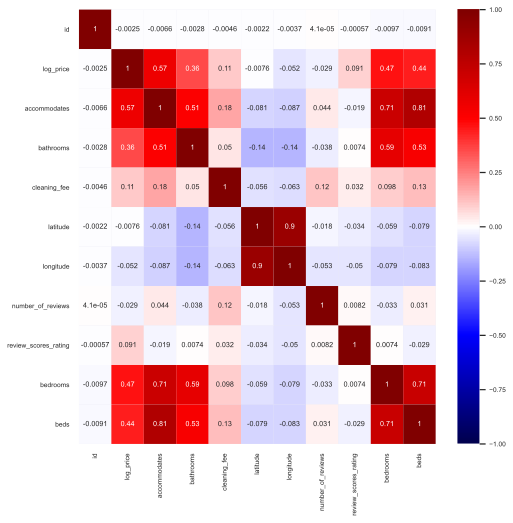

In [1242]:
sns.set(font_scale=0.6)
plt.figure(figsize=(8,8))
sns.heatmap(df_train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

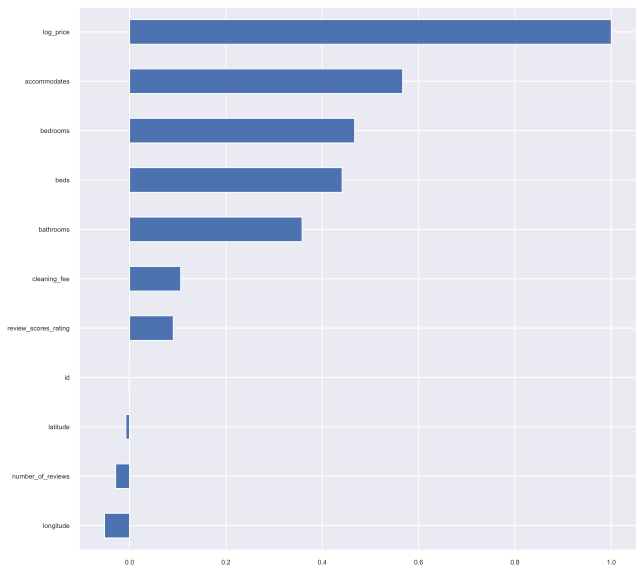

In [1243]:
plt.figure(figsize=(10,10))
df_train.corr()["log_price"].sort_values().plot(kind="barh")

# Date

<AxesSubplot:>

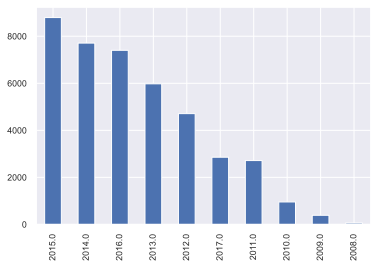

In [1244]:
sns.set(font_scale=0.8)
years =  pd.to_datetime(df_train['host_since'], format='%Y-%m-%d', errors='coerce').dt.year
years.value_counts().plot.bar()

<AxesSubplot:>

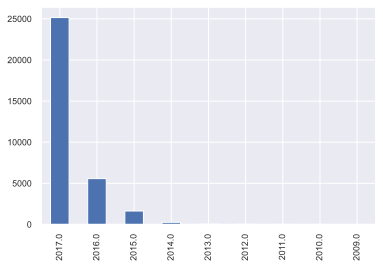

In [1245]:
sns.set(font_scale=0.8)
years =  pd.to_datetime(df_train['last_review'], format='%Y-%m-%d', errors='coerce').dt.year
years.value_counts().plot.bar()

<AxesSubplot:>

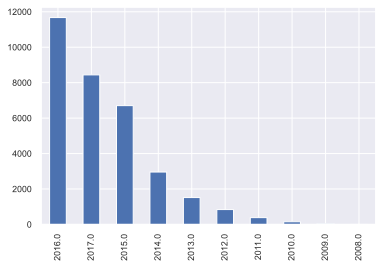

In [1246]:
sns.set(font_scale=0.8)
years =  pd.to_datetime(df_train['first_review'], format='%Y-%m-%d', errors='coerce').dt.year
years.value_counts().plot.bar()

# Handling Missing Values 

> #### 1. Bathrooms

In [1247]:
df_train.bathrooms.unique()

array([1. , 2.5, 2. , 1.5, 3.5, 4. , 3. , 5.5, 0.5, 7. , 4.5, nan, 0. ,
       8. , 6.5, 6. , 5. , 7.5])

In [1248]:
df_train["bathrooms"].mode()

0    1.0
dtype: float64

In [1249]:
df_train["bathrooms"].mean()

1.2325539438550912

In [1250]:
df_train["bathrooms"] = df_train['bathrooms'].fillna(1)

<ipython-input-1250-d52f2606436d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1251]:
#df_train["bathrooms"] = df_train['bathrooms'].fillna(df_train["bathrooms"].mode())

In [1252]:
df_train["bathrooms"].value_counts()

1.0    32867
2.0     4437
1.5     2131
2.5      920
3.0      553
3.5      235
4.0      156
0.5      113
0.0      100
4.5       64
5.0       39
5.5       22
8.0       16
6.0       12
6.5       10
7.0        8
7.5        4
Name: bathrooms, dtype: int64

> #### 2. review

Missing values in column "review_scores_rating" are related to column "number_of_reviews".

In [1253]:
df_train[["number_of_reviews","review_scores_rating"]][df_train.number_of_reviews == 0]

,number_of_reviews,review_scores_rating
17236,0,NaN
44799,0,NaN
44302,0,NaN
23542,0,NaN
71772,0,NaN
...,...,...
55032,0,NaN
11134,0,NaN
23754,0,NaN
29287,0,NaN


In [1254]:
df_train["review_scores_rating"] = df_train["review_scores_rating"].fillna(0)

<ipython-input-1254-e00e6facebf9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1255]:
df_train["review_scores_rating"].unique()

array([  0.,  93.,  95.,  91.,  92., 100.,  90.,  97.,  94.,  96.,  80.,
        87.,  86.,  71.,  98.,  82.,  89.,  88.,  83.,  75.,  99.,  73.,
        84.,  40.,  60.,  76.,  78.,  70.,  81.,  85.,  50.,  77.,  67.,
        79.,  74.,  68.,  20.,  72.,  53.,  65.,  57.,  69.,  64.,  63.,
        55.,  27.,  56.,  66.,  30.,  47.,  35.,  54.,  62.])

In [1256]:
df_train["review_scores_rating"] = df_train["review_scores_rating"]/100

<ipython-input-1256-9c04d0b8019c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1257]:
df_train["review_scores_rating"].unique()

array([0.  , 0.93, 0.95, 0.91, 0.92, 1.  , 0.9 , 0.97, 0.94, 0.96, 0.8 ,
       0.87, 0.86, 0.71, 0.98, 0.82, 0.89, 0.88, 0.83, 0.75, 0.99, 0.73,
       0.84, 0.4 , 0.6 , 0.76, 0.78, 0.7 , 0.81, 0.85, 0.5 , 0.77, 0.67,
       0.79, 0.74, 0.68, 0.2 , 0.72, 0.53, 0.65, 0.57, 0.69, 0.64, 0.63,
       0.55, 0.27, 0.56, 0.66, 0.3 , 0.47, 0.35, 0.54, 0.62])

> #### 3. bedrooms

In [1258]:
df_train.bedrooms.unique()

array([ 1.,  3.,  2.,  0.,  4.,  5., 10., nan,  6.,  9.,  7.,  8.])

In [1259]:
df_train["bedrooms"].mean()

1.2647920468734992

In [1260]:
df_train["bedrooms"].mode()

0    1.0
dtype: float64

In [1261]:
#df["bedrooms"] = df['bedrooms'].fillna(df["bedrooms"].mode())

In [1262]:
df_train["bedrooms"] = df_train["bedrooms"].fillna(1.0)

<ipython-input-1262-86ada30df938>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1263]:
df_train.bedrooms.value_counts()

1.0     28008
2.0      6437
0.0      3783
3.0      2445
4.0       737
5.0       189
6.0        46
7.0        23
8.0         9
10.0        5
9.0         5
Name: bedrooms, dtype: int64

> #### 4. number_of_reviews

In [1264]:
df_train["number_of_reviews"].max()

530

In [1265]:
df_train["number_of_reviews"] = (df_train["number_of_reviews"]/530)

<ipython-input-1265-75f9ee5f7171>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1266]:
df_train["number_of_reviews"].value_counts()

0.000000    8967
0.001887    3935
0.003774    2684
0.005660    2060
0.007547    1626
            ... 
0.581132       1
0.579245       1
0.445283       1
0.633962       1
0.754717       1
Name: number_of_reviews, Length: 340, dtype: int64

> #### 5. beds

In [1267]:
df_train["beds"].unique()

array([ 1.,  4.,  2.,  5.,  3.,  8.,  6.,  7., 10., 16., nan, 15.,  9.,
       14., 13., 12., 11.])

In [1268]:
df_train["beds"].mean()

1.706006727534839

In [1269]:
df_train["beds"].mode()

0    1.0
dtype: float64

In [1270]:
df_train["beds"] = df_train["beds"].fillna(2.0)

<ipython-input-1270-dbc915995b45>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1271]:
df_train["beds"].value_counts()

1.0     25410
2.0      9486
3.0      3630
4.0      1736
5.0       706
6.0       360
7.0       116
8.0        95
10.0       48
9.0        41
16.0       23
12.0       13
11.0       11
13.0        5
14.0        4
15.0        3
Name: beds, dtype: int64

> #### 6. host has profile pic

In [1272]:
df_train.host_has_profile_pic.unique()

array(['t', nan, 'f'], dtype=object)

In [1273]:
df_train.host_has_profile_pic.value_counts()

t    41448
f      125
Name: host_has_profile_pic, dtype: int64

> #### 7. host_identity_verified

In [1274]:
df_train.host_identity_verified.unique()

array(['t', 'f', nan], dtype=object)

In [1275]:
df_train.host_identity_verified.value_counts()

t    28016
f    13557
Name: host_identity_verified, dtype: int64

the columns host_has_profile_pic and host_identity_verified has boolean values true and false¶


In [1276]:
df_train.replace(to_replace = "t", value = 1,inplace=True) 
df_train.replace(to_replace = "f", value = 0,inplace=True) 

/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1277]:
df_train["host_has_profile_pic"] = df_train["host_has_profile_pic"].astype("bool")
df_train["host_identity_verified"] = df_train["host_identity_verified"].astype("bool")

<ipython-input-1277-45e8611d5102>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1277-45e8611d5102>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1278]:
df_train.host_identity_verified.value_counts()

True     28130
False    13557
Name: host_identity_verified, dtype: int64

In [1279]:
df_train.host_has_profile_pic.value_counts()

True     41562
False      125
Name: host_has_profile_pic, dtype: int64

### Changed the datatype to bool of these two columns:

In [1280]:
df["host_has_profile_pic"] = df["host_has_profile_pic"].astype("bool")
df["host_identity_verified"] = df["host_identity_verified"].astype("bool")

> #### 8.host response rate

In [1281]:
df_train.host_response_rate.unique()

array(['100%', '70%', nan, '0%', '95%', '92%', '60%', '50%', '90%', '97%',
       '93%', '42%', '78%', '96%', '91%', '84%', '82%', '33%', '88%',
       '44%', '80%', '89%', '67%', '86%', '98%', '75%', '40%', '63%',
       '94%', '38%', '99%', '20%', '83%', '57%', '77%', '73%', '58%',
       '87%', '26%', '81%', '69%', '55%', '71%', '25%', '68%', '85%',
       '56%', '65%', '30%', '62%', '22%', '64%', '59%', '54%', '17%',
       '14%', '43%', '79%', '11%', '10%', '53%', '23%', '72%', '76%',
       '29%', '35%', '74%', '46%', '41%', '36%', '47%', '66%', '52%',
       '61%', '6%', '21%', '27%'], dtype=object)

In [1282]:
df_train.host_response_rate = df.host_response_rate.apply(
    lambda x: int(x[:len(x)-1])/100
     if isinstance(x,str) else x )

/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1283]:
df_train.host_response_rate.unique()

array([1.  , 0.7 ,  nan, 0.  , 0.95, 0.92, 0.6 , 0.5 , 0.9 , 0.97, 0.93,
       0.42, 0.78, 0.96, 0.91, 0.84, 0.82, 0.33, 0.88, 0.44, 0.8 , 0.89,
       0.67, 0.86, 0.98, 0.75, 0.4 , 0.63, 0.94, 0.38, 0.99, 0.2 , 0.83,
       0.57, 0.77, 0.73, 0.58, 0.87, 0.26, 0.81, 0.69, 0.55, 0.71, 0.25,
       0.68, 0.85, 0.56, 0.65, 0.3 , 0.62, 0.22, 0.64, 0.59, 0.54, 0.17,
       0.14, 0.43, 0.79, 0.11, 0.1 , 0.53, 0.23, 0.72, 0.76, 0.29, 0.35,
       0.74, 0.46, 0.41, 0.36, 0.47, 0.66, 0.52, 0.61, 0.06, 0.21, 0.27])

In [1284]:
df_train.host_response_rate.mean()

0.9438197629969498

In [1285]:
df_train.host_response_rate = df_train.host_response_rate.fillna(df_train.host_response_rate.mean())

In [1286]:
df_train["host_response_rate"]

17236    1.00000
58369    0.70000
44240    1.00000
57759    1.00000
40254    1.00000
          ...   
34345    1.00000
58878    1.00000
50162    0.94382
49893    1.00000
68913    1.00000
Name: host_response_rate, Length: 41687, dtype: float64

In [1287]:
df_train.host_response_rate.value_counts()

1.00000    24387
0.94382    10295
0.90000     1286
0.80000      647
0.00000      506
           ...  
0.22000        1
0.27000        1
0.23000        1
0.41000        1
0.06000        1
Name: host_response_rate, Length: 77, dtype: int64

In [1288]:
df_train.host_response_rate.unique()

array([1.        , 0.7       , 0.94381976, 0.        , 0.95      ,
       0.92      , 0.6       , 0.5       , 0.9       , 0.97      ,
       0.93      , 0.42      , 0.78      , 0.96      , 0.91      ,
       0.84      , 0.82      , 0.33      , 0.88      , 0.44      ,
       0.8       , 0.89      , 0.67      , 0.86      , 0.98      ,
       0.75      , 0.4       , 0.63      , 0.94      , 0.38      ,
       0.99      , 0.2       , 0.83      , 0.57      , 0.77      ,
       0.73      , 0.58      , 0.87      , 0.26      , 0.81      ,
       0.69      , 0.55      , 0.71      , 0.25      , 0.68      ,
       0.85      , 0.56      , 0.65      , 0.3       , 0.62      ,
       0.22      , 0.64      , 0.59      , 0.54      , 0.17      ,
       0.14      , 0.43      , 0.79      , 0.11      , 0.1       ,
       0.53      , 0.23      , 0.72      , 0.76      , 0.29      ,
       0.35      , 0.74      , 0.46      , 0.41      , 0.36      ,
       0.47      , 0.66      , 0.52      , 0.61      , 0.06   

> #### 9.drob

In [1289]:
#id
#description
 ##first_review
 ##last_review
 ##host_since
#host_has_profile_pic
#name
#thumbnail_url
#zipcode


In [1290]:
df_train = df_train.drop(['id','description','first_review','last_review','host_since',
                          'name','thumbnail_url','zipcode'],axis=1)
df_train.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'latitude', 'longitude', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

In [1291]:
df_train.isna().sum()

log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
host_has_profile_pic         0
host_identity_verified       0
host_response_rate           0
instant_bookable             0
latitude                     0
longitude                    0
neighbourhood             3889
number_of_reviews            0
review_scores_rating         0
bedrooms                     0
beds                         0
dtype: int64

In [1292]:
df_train.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
17236,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",3,1.0,Real Bed,strict,True,Boston,...,True,1.0,0,42.328538,-71.110867,Jamaica Plain,0.000000,0.00,1.0,1.0
58369,4.382027,Apartment,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",1,1.0,Real Bed,flexible,True,LA,...,True,0.7,1,34.033205,-118.447229,West Los Angeles,0.005660,0.93,1.0,1.0
44240,5.293305,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",8,1.0,Real Bed,strict,True,Chicago,...,True,1.0,1,41.947665,-87.656500,Wrigleyville,0.132075,0.95,3.0,4.0
57759,4.060443,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,2.5,Real Bed,strict,True,Chicago,...,True,1.0,0,41.882181,-87.708795,NaN,0.177358,0.95,1.0,2.0
40254,4.174387,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,1.0,Real Bed,moderate,True,LA,...,True,1.0,1,33.928853,-118.375224,Hawthorne,0.128302,0.91,1.0,2.0


> #### 10.amenities

#### Try1

In [1293]:
import re
amenities_set = set()
for amenitie in df_train['amenities']:
    amenitie_set = set(re.sub(r'(\"|\{|\})', '', amenitie).split(','))
    for piece in amenitie_set:
        if "translation missing" not in piece and piece:
            amenities_set.add(piece.strip())
            
amenities_set

{'24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower & toilet',
 'Flat',
 'Flat smooth pathway to front door',
 'Free parking on premis

In [1294]:
def dum_col_filling(main_col_val, dum_col_name, main_col_name):
    if dum_col_name.replace(main_col_name + ': ', '') in main_col_val:
        return 1
    else:
        return 0

In [1295]:
   def set_to_dummies(df, column_name):
    all_values_of_sets = amenities_set
    dummy_columns_name = [column_name + ': ' + dum_col for dum_col in all_values_of_sets if dum_col]
    dummy_df = pd.DataFrame(0, index=df.index, columns=dummy_columns_name)
    df = pd.concat([dummy_df, df], axis = 1)
    for dum_col_name in dummy_columns_name:
        for i in df.index:
            df[dum_col_name][i] = dum_col_filling(df[column_name][i], dum_col_name, column_name)
    return df

In [1296]:
df_train = set_to_dummies(df_train, 'amenities')

<ipython-input-1295-fa95ca4829cb>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Try2

In [1297]:
# l=list(df_train['amenities'])
# l=[[word.strip('[" ]') for word in row[1:-1].split(',')] for row in list(df_train['amenities'])]
# cols = set(word for row in l  for word in row)
# amenities_df=pd.DataFrame(columns=cols)
# print(cols)
# amenities_df = pd.DataFrame(columns=cols)
# for row_idx in range(len(l)):
#     for col in cols:
#         amenities_df.loc[row_idx,col]=int(col in l[row_idx])

In [1298]:
# amenities_df

In [1299]:
# # Building a new field aggregating fields from amenities_df
# # The new fields will be: kitchen, accesibility, Electricity_and_Technology, facilities, kids_friendly, security, services

# amenities_group_df = pd.DataFrame()
# #--------------------------------------
# amenities_group_df['kitchen'] = amenities_df['Kitchen']+amenities_df['Breakfast']+amenities_df['Cooking basics']+amenities_df['Cooking basics']+amenities_df['BBQ grill']+amenities_df['Oven']+amenities_df['Coffee maker']+amenities_df['Microwave']+amenities_df['Refrigerator']+amenities_df['Dishwasher']
# amenities_group_df['accesibility'] = amenities_df['Free parking on premises']+amenities_df['Wide clearance to bed']+amenities_df['smooth pathway to front door']+amenities_df['Ground floor access']+amenities_df['Lake access']+amenities_df['Wheelchair accessible']+amenities_df['Wide clearance to shower & toilet']+amenities_df['Wide hallway clearance']+amenities_df['Wide doorway']+amenities_df['Accessible-height toilet']+amenities_df['Step-free access']+amenities_df['Well-lit path to entrance']+amenities_df['Waterfront']+amenities_df['Free parking on street']+amenities_df['Disabled parking spot']+amenities_df['Accessible-height bed']+amenities_df['Private entrance']+amenities_df['Elevator']
# amenities_group_df['Elect_Tech'] = amenities_df['Wide entryway']+amenities_df['Air conditioning']+amenities_df['Ethernet connection']+amenities_df['Cable TV']+amenities_df['Internet']+amenities_df['EV charger']+amenities_df['Baby monitor']+amenities_df['TV']+amenities_df['Wireless Internet']+amenities_df['Pocket wifi']+amenities_df['Washer']+amenities_df['Dryer']+amenities_df['Keypad']+amenities_df['Game console']+amenities_df['Washer / Dryer']+amenities_df['Hair dryer']
# amenities_group_df['facilities'] = amenities_df['Private living room']+amenities_df['Air purifier']+amenities_df['Handheld shower head']+amenities_df['Hot water kettle']+amenities_df['Extra pillows and blankets']+amenities_df['Hot tub']+amenities_df['Pets live on this property']+amenities_df['Heating']+amenities_df['Dishes and silverware']+amenities_df['Patio or balcony']+amenities_df['Bed linens']+amenities_df['First aid kit']+amenities_df['Crib']+amenities_df['Flat']+amenities_df['Laptop friendly workspace']+amenities_df['Buzzer/wireless intercom']+amenities_df['Firm mattress']+amenities_df['Iron']+amenities_df['Changing table']+amenities_df['Hangers']+amenities_df['Roll-in shower with chair']+amenities_df['Gym']+amenities_df['Outlet covers']+amenities_df['Essentials']+amenities_df['Private bathroom']+amenities_df['Baby bath']+amenities_df['Bathtub']+amenities_df['Shampoo']+amenities_df['Beachfront']+amenities_df['Single level home']+amenities_df['Hot water']+amenities_df['High chair']+amenities_df['Bathtub with shower chair']+amenities_df['Pool']+amenities_df['Fixed grab bars for shower & toilet']+amenities_df['Room-darkening shades']+amenities_df['Beach essentials']+amenities_df['Garden or backyard']
# amenities_group_df['kids_friendly'] = amenities_df['Babysitter recommendations']+amenities_df['Family/kid friendly']+amenities_df['Children’s books and toys']+amenities_df['Children’s dinnerware']
# amenities_group_df['security'] = amenities_df['Window guards']+amenities_df['Stair gates']+amenities_df['Fireplace guards']+amenities_df['Doorman']+amenities_df['Carbon monoxide detector']+amenities_df['Smoke detector']+amenities_df['Table corner guards']+amenities_df['Fire extinguisher']+amenities_df['Lock on bedroom door']+amenities_df['Smart lock']+amenities_df['Lockbox']
# amenities_group_df['services'] = amenities_df['Ski in/Ski out']+amenities_df['Cleaning before checkout']+amenities_df['Long term stays allowed']+amenities_df['Other pet(s)']+amenities_df['Cat(s)']+amenities_df['Self Check-In']+amenities_df['24-hour check-in']+amenities_df['Host greets you']+amenities_df['Luggage dropoff allowed']+amenities_df['Pack ’n Play/travel crib']+amenities_df['Pets allowed']+amenities_df['Suitable for events']+amenities_df['Safety card']+amenities_df['Indoor fireplace']+amenities_df['Dog(s)']+amenities_df['Smoking allowed']

In [1300]:
# amenities_group_df=amenities_group_df.astype("int64")

In [1301]:
# amenities_group_df.info()

In [1302]:
#  amenities_group_df[amenities_group_df >= 2 ] = 1


In [1303]:
# amenities_group_df

In [1304]:
# df_train['join_key'] = range(0,len(df_train))
# df_train.index = df_train['join_key']

In [1305]:
# df_train = df_train.join(amenities_group_df)

In [1306]:
# df_train.isna().sum()

# Factorization of categorical columns

### 1- room_type

In [1307]:
df_train.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [1308]:
df_train.room_type.value_counts()

Entire home/apt    23233
Private room       17235
Shared room         1219
Name: room_type, dtype: int64

In [1309]:
#df1 = pd.concat([df1, pd.get_dummies(df1['room_type'], prefix='room_type')],axis=1)

In [1310]:
#df1 = df1.drop(['room_type'],axis=1)

In [1311]:
# def room_type_cleaning(x):
#     if x=='Entire home/apt':
#         x= 3
#     elif x=='Private room':
#         x= 2
#     elif x=='Shared room':
#         x= 1
#     return x
# df_train['room_type']=df_train['room_type'].map(lambda x: room_type_cleaning(x))

In [1312]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['room_type'], prefix='room_type')],axis=1) 

In [1313]:
df_train = df_train.drop(['room_type'],axis=1)

In [1314]:
#df1.room_type = df1.room_type.apply(lambda x: 3 if x=='Entire home/apt' else 2 if x=='Private room' else 1)

In [1315]:
df_train.isna().sum()

amenities: Wide doorway            0
amenities: Oven                    0
amenities: Outlet covers           0
amenities: Elevator in building    0
amenities: Firm mattress           0
                                  ..
bedrooms                           0
beds                               0
room_type_Entire home/apt          0
room_type_Private room             0
room_type_Shared room              0
Length: 144, dtype: int64

### 2- bed_type

In [1316]:
df_train.bed_type.unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'],
      dtype=object)

In [1317]:
df_train.bed_type.value_counts()

Real Bed         40461
Futon              453
Pull-out Sofa      343
Airbed             263
Couch              167
Name: bed_type, dtype: int64

In [1318]:
df_train.bed_type = df_train.bed_type.map(lambda x: 2 if x=='Real Bed' else 1)

In [1319]:
#df_train = pd.concat([df_train, pd.get_dummies(df_train['bed_type'], prefix='bed_type')],axis=1)

In [1320]:
#df_train = df_train.drop(['bed_type'],axis=1)

### 3- city

In [1321]:
df_train['city'].unique()

array(['Boston', 'LA', 'Chicago', 'NYC', 'SF', 'DC'], dtype=object)

In [1322]:
df_train['city'].value_counts()

NYC        18296
LA         12554
SF          3590
DC          3176
Chicago     2093
Boston      1978
Name: city, dtype: int64

In [1323]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['city'], prefix='city')],axis=1)

In [1324]:
df_train = df_train.drop(['city'],axis=1)

In [1325]:
df_train.isna().sum()

amenities: Wide doorway            0
amenities: Oven                    0
amenities: Outlet covers           0
amenities: Elevator in building    0
amenities: Firm mattress           0
                                  ..
city_Chicago                       0
city_DC                            0
city_LA                            0
city_NYC                           0
city_SF                            0
Length: 149, dtype: int64

## 4- property_type

In [1326]:
df_train.property_type.unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse',
       'Camper/RV', 'Cabin', 'Boutique hotel', 'Bed & Breakfast',
       'Guesthouse', 'Bungalow', 'Other', 'Villa', 'Boat', 'Hostel',
       'Guest suite', 'Timeshare', 'Castle', 'In-law', 'Dorm', 'Yurt',
       'Vacation home', 'Tent', 'Hut', 'Serviced apartment',
       'Earth House', 'Treehouse', 'Lighthouse', 'Train', 'Island',
       'Chalet', 'Cave'], dtype=object)

In [1327]:
df_train.property_type.value_counts()

Apartment             27503
House                  9320
Condominium            1519
Townhouse               985
Loft                    673
Other                   360
Guesthouse              279
Bed & Breakfast         270
Bungalow                201
Villa                   100
Dorm                     73
Guest suite              70
Camper/RV                53
Timeshare                44
Boat                     39
Cabin                    37
Boutique hotel           34
In-law                   34
Hostel                   31
Serviced apartment       12
Tent                     10
Castle                    8
Vacation home             6
Yurt                      5
Hut                       4
Treehouse                 4
Earth House               4
Chalet                    3
Cave                      2
Train                     2
Island                    1
Lighthouse                1
Name: property_type, dtype: int64

In [1328]:
nbh_counts = df_train.property_type.value_counts()

In [1329]:
other_nbhs = list(nbh_counts[nbh_counts <= 300].index)

In [1330]:
df_train['property_type'] = df_train['property_type'].replace(other_nbhs,"Other")

In [1331]:
df_train['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Other'],
      dtype=object)

In [1332]:
df_train['property_type'].value_counts()

Apartment      27503
House           9320
Other           1687
Condominium     1519
Townhouse        985
Loft             673
Name: property_type, dtype: int64

In [1333]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['property_type'], prefix='property_type')],axis=1)

In [1334]:
df_train = df_train.drop(['property_type'],axis=1)

## 5-cancellation_policy

In [1335]:
df_train['cancellation_policy'].unique()

array(['strict', 'flexible', 'moderate', 'super_strict_30',
       'super_strict_60'], dtype=object)

In [1336]:
df_train['cancellation_policy'].value_counts()

strict             18226
flexible           12748
moderate           10645
super_strict_30       57
super_strict_60       11
Name: cancellation_policy, dtype: int64

In [1337]:
# def cancellation_policy_cleaning(x):
#     if x=='super_strict_60':
#         x= 5
#     elif x=='super_strict_30':
#         x= 4
#     elif x=='strict':
#         x= 3
#     elif x=='moderate':
#         x= 2
#     elif x=='flexible':
#         x= 1     
#     return x
# df_train['cancellation_policy']=df_train['cancellation_policy'].map(lambda x: cancellation_policy_cleaning(x))

In [1338]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['cancellation_policy'], prefix='cancellation_policy')],axis=1)

In [1339]:
df_train = df_train.drop(['cancellation_policy'],axis=1)

In [1340]:
#df_train['cancellation_policy'].value_counts()

## 6-cleaning_fee and host_identity_verified

In [1341]:
df_train.replace(to_replace = True , value = 1,inplace=True) 
df_train.replace(to_replace = False , value = 0,inplace=True)

## 7- first_review

In [1342]:
#df_train['first_review'] = df_train['first_review'].apply(first_review_poc)

In [1343]:
#df_train['first_review'].unique()

In [1344]:
#df_train = pd.concat([df_train, pd.get_dummies(df_train['first_review'], prefix='first_review')],axis=1) 

# neighbourhood

In [1345]:
from decimal import Decimal
Decimal('Infinity')

Decimal('Infinity')

In [1346]:
import math
test = math.inf

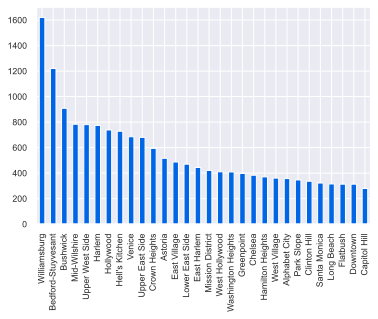

In [1347]:
# Adding price per room field (For neighnourhood price level)

df_train['price_per_room'] = (df_train.log_price) / (df_train.bedrooms)

df_train.neighbourhood.value_counts().head(30).plot.bar(color=(.0, 0.4, 0.9, 1))

neighbourhood_avg_price = df_train[['neighbourhood','price_per_room']].groupby('neighbourhood')['price_per_room'].mean().sort_values()

In [1348]:
df_train = df_train.replace([np.inf], np.nan)

In [1349]:
df_train['price_per_room'].value_counts()

4.605170    1218
3.912023    1047
4.317488    1021
5.010635     978
4.094345     934
            ... 
1.165503       1
1.270351       1
1.425555       1
1.329661       1
0.000000       1
Name: price_per_room, Length: 1633, dtype: int64

In [1350]:
neighbourhood_avg_price.replace(np.inf, np.nan,inplace=True)
neighbourhood_avg_price.fillna(neighbourhood_avg_price.mean(),inplace=True)

print(neighbourhood_avg_price.sort_values(ascending=False))
print('---------------------------------------')
print(neighbourhood_avg_price.describe())

neighbourhood
Wilmington           7.170120
Fort Wadsworth       5.703782
Government Center    5.521461
Presidio             5.521461
Bellevue             5.480639
                       ...   
Gateway              1.684834
Emerson Hill         1.534508
Castleton Corners    1.398678
Tottenville          1.363065
West Athens          0.864584
Name: price_per_room, Length: 596, dtype: float64
---------------------------------------
count    596.000000
mean       3.692075
std        0.527644
min        0.864584
25%        3.692075
50%        3.692075
75%        3.692075
max        7.170120
Name: price_per_room, dtype: float64


In [1351]:
neighbourhood_class_df = neighbourhood_avg_price.to_frame()
type(neighbourhood_class_df)

pandas.core.frame.DataFrame

In [1352]:
# Converting neighbourhoods to Levels
def neigbourhood_class(row):
  if row['price_per_room'] >=0 and row['price_per_room'] <= 3.683610:
    return 1
  elif row['price_per_room'] > 3.6836100 and row['price_per_room'] <= 3.868928:
    return 2
  elif row['price_per_room'] >3.868928 and row['price_per_room'] <= 4.194452: 
    return 3
  else:
    return 4
  
neighbourhood_class_df['neigbourhood_level'] = neighbourhood_class_df.apply(neigbourhood_class,axis=1)

In [1353]:
neighbourhood_class_df.sort_values(by='neigbourhood_level',ascending=False)

,price_per_room,neigbourhood_level
neighbourhood,,
Bellevue,5.480639,4
"Takoma Park, MD",5.298317,4
Beverly,4.499810,4
O'Hare,4.498264,4
Kingsbridge,4.484654,4
...,...,...
Little Village,3.466917,1
West Brighton,3.483986,1
Belmont Cragin,3.491164,1


In [1354]:
 neighbourhood_class_df.drop('price_per_room',axis=1,inplace=True)

In [1355]:
# Joining between the Main Data Frame and the  neighbourhood_class data frame to get neighbourhood class
df_train = df_train.join(neighbourhood_class_df,on='neighbourhood')

In [1356]:
df_train["neigbourhood_level"].value_counts()

2.0    36405
1.0      999
3.0      201
4.0      193
Name: neigbourhood_level, dtype: int64

In [1357]:
df_train.neigbourhood_level = df_train.neigbourhood_level.fillna(2)

In [1358]:
df_train = df_train.drop(['neighbourhood'],axis=1)

In [1359]:
df_train = df_train.drop(['price_per_room'],axis=1)

In [1360]:
X_train, y_train = df_train.drop(['log_price',"amenities"],axis=1), df_train['log_price']

# DF

In [1366]:
df = pd.read_csv("/Users/nouf/Desktop/Airbnb_price_prediction/Data/train.csv")

In [1367]:
#bathroom

df["bathrooms"] = df['bathrooms'].fillna(1.0)

#review 

df["review_scores_rating"] = df["review_scores_rating"].fillna(0)
df["review_scores_rating"] = df["review_scores_rating"]/100

#bedrooms

df["bedrooms"] = df["bedrooms"].fillna(1.0)

#number_of_reviews

df["number_of_reviews"] = (df["number_of_reviews"]/530)

#Beds

df["beds"] = df["beds"].fillna(2.0)

#host_identity_verified, #host has profile pic

df.replace(to_replace = "t", value = 1,inplace=True) 
df.replace(to_replace = "f", value = 0,inplace=True) 
df["host_has_profile_pic"] = df["host_has_profile_pic"].astype("bool")
df["host_identity_verified"] = df["host_identity_verified"].astype("bool")

#host response rate

df.host_response_rate = df.host_response_rate.apply(
    lambda x: int(x[:len(x)-1])/100
     if isinstance(x,str) else x )

df.host_response_rate = df.host_response_rate.fillna(0.9438197629969498)

###Drop
#id
#description
 ##first_review
 ##last_review
 ##host_since
#host_has_profile_pic
#name
#thumbnail_url
#zipcode


df = df.drop(['id','description','first_review','last_review','host_since',
                          'host_has_profile_pic','name','thumbnail_url','zipcode'],axis=1)
df.columns

# amenities
 

#room_type
df = pd.concat([df, pd.get_dummies(df['room_type'], prefix='room_type')],axis=1) 
df = df.drop(['room_type'],axis=1)

#bed_type
df.bed_type = df.bed_type.map(lambda x: 2 if x=='Real Bed' else 1)

#city
df = pd.concat([df, pd.get_dummies(df['city'], prefix='city')],axis=1)
df = df.drop(['city'],axis=1)

#property_type

nbh_counts = df.property_type.value_counts()
other_nbhs = list(nbh_counts[nbh_counts <= 300].index)
df['property_type'] = df['property_type'].replace(other_nbhs,"Other")
df = pd.concat([df, pd.get_dummies(df['property_type'], prefix='property_type')],axis=1)
df = df.drop(['property_type'],axis=1)

#cancellation_policy

df = pd.concat([df, pd.get_dummies(df['cancellation_policy'], prefix='cancellation_policy')],axis=1)
df = df.drop(['cancellation_policy'],axis=1)

#cleaning_fee and host_identity_verified
df.replace(to_replace = True , value = 1,inplace=True) 
df.replace(to_replace = False , value = 0,inplace=True)

In [1368]:
import re
amenities_set = set()
for amenitie in df['amenities']:
    amenitie_set = set(re.sub(r'(\"|\{|\})', '', amenitie).split(','))
    for piece in amenitie_set:
        if "translation missing" not in piece and piece:
            amenities_set.add(piece.strip())
        

In [1369]:
def dum_col_filling(main_col_val, dum_col_name, main_col_name):
    if dum_col_name.replace(main_col_name + ': ', '') in main_col_val:
        return 1
    else:
        return 0
    

In [1371]:
def set_to_dummies(df, column_name):
    all_values_of_sets = amenities_set
    dummy_columns_name = [column_name + ': ' + dum_col for dum_col in all_values_of_sets if dum_col]
    dummy_df = pd.DataFrame(0, index=df.index, columns=dummy_columns_name)
    df = pd.concat([dummy_df, df], axis = 1)
    for dum_col_name in dummy_columns_name:
        for i in df.index:
            df[dum_col_name][i] = dum_col_filling(df[column_name][i], dum_col_name, column_name)
    return df

In [1372]:
df = set_to_dummies(df, 'amenities')

<ipython-input-1371-516adddc745c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



neighbourhood
Wilmington           7.170120
Harvard Square       5.480639
Coolidge Corner      5.416100
Government Center    5.357209
Lighthouse HIll      5.298317
                       ...   
Chevy Chase, MD      1.426180
Castleton Corners    1.398678
West Athens          1.288258
Rossville            1.100252
Mill Basin           1.035768
Name: price_per_room, Length: 619, dtype: float64
---------------------------------------
count    619.000000
mean       3.632128
std        0.493510
min        1.035768
25%        3.632128
50%        3.632128
75%        3.632128
max        7.170120
Name: price_per_room, dtype: float64


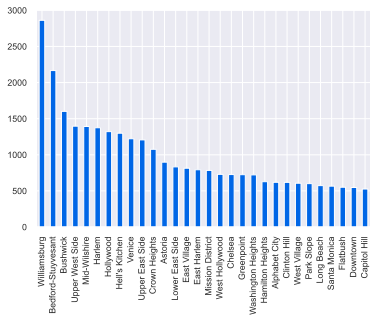

In [1373]:
# Adding price per room field (For neighnourhood price level)

df['price_per_room'] = (df.log_price) / (df.bedrooms)

df.neighbourhood.value_counts().head(30).plot.bar(color=(.0, 0.4, 0.9, 1))

neighbourhood_avg_price = df[['neighbourhood','price_per_room']].groupby('neighbourhood')['price_per_room'].mean().sort_values()

df = df.replace([np.inf], np.nan)

df['price_per_room'].value_counts()

neighbourhood_avg_price.replace(np.inf, np.nan,inplace=True)
neighbourhood_avg_price.fillna(neighbourhood_avg_price.mean(),inplace=True)

print(neighbourhood_avg_price.sort_values(ascending=False))
print('---------------------------------------')
print(neighbourhood_avg_price.describe())

neighbourhood_class_df = neighbourhood_avg_price.to_frame()
type(neighbourhood_class_df)

neighbourhood_class_df = neighbourhood_avg_price.to_frame()
type(neighbourhood_class_df)

# Converting neighbourhoods to Levels
def neigbourhood_class(row):
  if row['price_per_room'] >=0 and row['price_per_room'] <= 3.683610:
    return 1
  elif row['price_per_room'] > 3.6836100 and row['price_per_room'] <= 3.868928:
    return 2
  elif row['price_per_room'] >3.868928 and row['price_per_room'] <= 4.194452: 
    return 3
  else:
    return 4
  
neighbourhood_class_df['neigbourhood_level'] = neighbourhood_class_df.apply(neigbourhood_class,axis=1)

neighbourhood_class_df.sort_values(by='neigbourhood_level',ascending=False)
neighbourhood_class_df.drop('price_per_room',axis=1,inplace=True)

# Joining between the Main Data Frame and the  neighbourhood_class data frame to get neighbourhood class
df = df.join(neighbourhood_class_df,on='neighbourhood')

df["neigbourhood_level"].value_counts()

df.neigbourhood_level = df.neigbourhood_level.fillna(2)

df = df.drop(['neighbourhood'],axis=1)

df = df.drop(['price_per_room'],axis=1)

# CV

In [1380]:
from sklearn.model_selection import KFold

X, y = df.drop(['log_price',"amenities"],axis=1), df['log_price']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=101) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [1381]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [1382]:
from sklearn.model_selection import cross_val_score

In [1383]:
#LinearRegression
lin_reg = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state = 101)
print(cross_val_score(lin_reg, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2'))
      
print(np.mean(cross_val_score(lin_reg, X, y, cv=kf, scoring='r2')))

[0.61643193 0.59993    0.60132985 0.61536207 0.60505859]
0.6073253647891723


In [1384]:

#RidgeRegression
lm_reg = Ridge(alpha=1)

print(cross_val_score(lm_reg, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2'))

print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))


[0.60613148 0.5900922  0.59098311 0.60469421 0.59506711]
0.5971607078396008


In [1385]:
#XGBRegressor
import xgboost as xgb

lm_xgb = xgb.XGBRegressor()

print(cross_val_score(lm_xgb, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2'))

print(np.mean(cross_val_score(lm_xgb, X, y, cv=kf, scoring='r2')))



[0.72669592 0.70537268 0.71363946 0.72264327 0.71099167]
0.7158669075168568


In [1386]:
X, y = df.drop(['log_price',"amenities"],axis=1), df['log_price']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=101)

In [1387]:
from sklearn import metrics
from scipy import stats

def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)

In [1388]:
def analysis(model, X_train, X_test, y_train, y_test):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

In [1389]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import  mean_squared_error, r2_score

# Running model a XGB Regressor
model = xgb.XGBRegressor()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict
pred_train = model.predict(X_train)

# Validate
pred_val = model.predict(X_val)

print("\nTraining MSE:", round(mean_squared_error(y_train, pred_train),4))
print("Validation MSE:", round(mean_squared_error(y_val, pred_val),4))
print("\nTraining r2:", round(r2_score(y_train, pred_train),4))
print("Validation r2:", round(r2_score(y_val, pred_val),4))


Training MSE: 0.1009
Validation MSE: 0.1441

Training r2: 0.8038
Validation r2: 0.7187


,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.28,0.14,0.38,0.079,0.066,0.72,0.8


/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



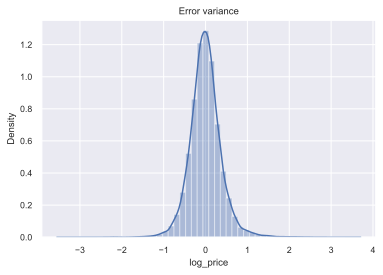

In [1390]:
from sklearn.ensemble import RandomForestRegressor

analysis(
    model = model, 
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test =  y_test
)